## 1. Load the dataset

In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset
# Ensure the filename matches exactly what you uploaded
file_path = 'SmartPlannerDataset2026.csv'
df = pd.read_csv(file_path)

## 2. Clenup and Preview

In [ ]:
# The dataset often has empty columns at the end (Unnamed), let's drop them if they exist
df = df.dropna(axis=1, how='all')

# Preview the data to ensure it loaded correctly
print("Dataset loaded successfully!")
print("-" * 30)
print(df.head())
print("-" * 30)
print(df.info())

Dataset loaded successfully!
------------------------------
   PVSize(kW) InverterBrand  InverterSize  PanelType(W)  PanelCount  \
0           3       Growatt  Growatt 3 kW           595           6   
1          10        Huawei  Huawei 10 kW           500          20   
2         100          SAKO   SAKO 100 kW           640         200   
3          40          Deye    Deye 40 kW           550          80   
4          30        Huawei  Huawei 30 kW           550          60   

  SystemType  Battery(kWh) EstimatedCost(LKR)  
0     Hybrid            10       1,252,500.00  
1   Off-Grid             5       1,750,000.00  
2   Off-Grid             5      12,760,000.00  
3   Off-Grid             0       5,125,000.00  
4   Off-Grid             5       4,225,000.00  
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              -------------- 

## 3.  EDA(Exploratory Data Analysis)

In [ ]:
# Fix 'EstimatedCost(LKR)': Remove commas and convert to float
# Example: "1,250,000" becomes 1250000.0
df['EstimatedCost(LKR)'] = df['EstimatedCost(LKR)'].astype(str).str.replace(',', '').astype(float)

In [ ]:
# 3. Display Summary Statistics
print("--- Data Summary ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Summary ---
        PVSize(kW)  PanelType(W)   PanelCount  Battery(kWh)  \
count  5000.000000   5000.000000  5000.000000   5000.000000   
mean     25.291000    572.576000    50.582000      6.527000   
std      29.069113     52.129912    58.138226      7.354188   
min       1.000000    500.000000     2.000000      0.000000   
25%       4.000000    550.000000     8.000000      0.000000   
50%      10.000000    595.000000    20.000000      5.000000   
75%      40.000000    640.000000    80.000000     15.000000   
max     100.000000    640.000000   200.000000     20.000000   

       EstimatedCost(LKR)  
count        5.000000e+03  
mean         3.668334e+06  
std          3.519343e+06  
min          1.200000e+05  
25%          1.170000e+06  
50%          2.125000e+06  
75%          5.192500e+06  
max          1.366000e+07  

--- Missing Values ---
PVSize(kW)            0
InverterBrand         0
InverterSize          0
PanelType(W)          0
PanelCount            0
SystemType     

/tmp/ipython-input-1037852850.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SystemType', data=df, palette='viridis')


Text(0, 0.5, 'Count')

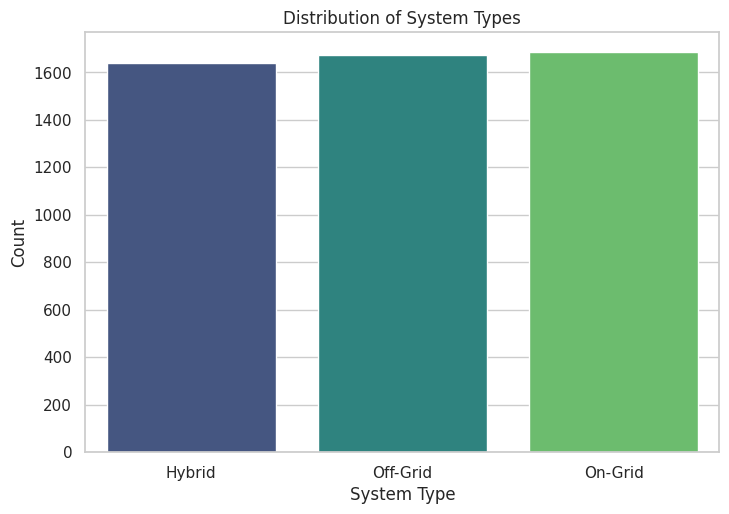

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of System Types
plt.subplot(2, 2, 1)
sns.countplot(x='SystemType', data=df, palette='viridis')
plt.title('Distribution of System Types')
plt.xlabel('System Type')
plt.ylabel('Count')

/tmp/ipython-input-1970742334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InverterBrand', data=df, palette='magma', order=df['InverterBrand'].value_counts().index)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Deye'),
  Text(1, 0, 'Solax'),
  Text(2, 0, 'SAKO'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Growatt')])

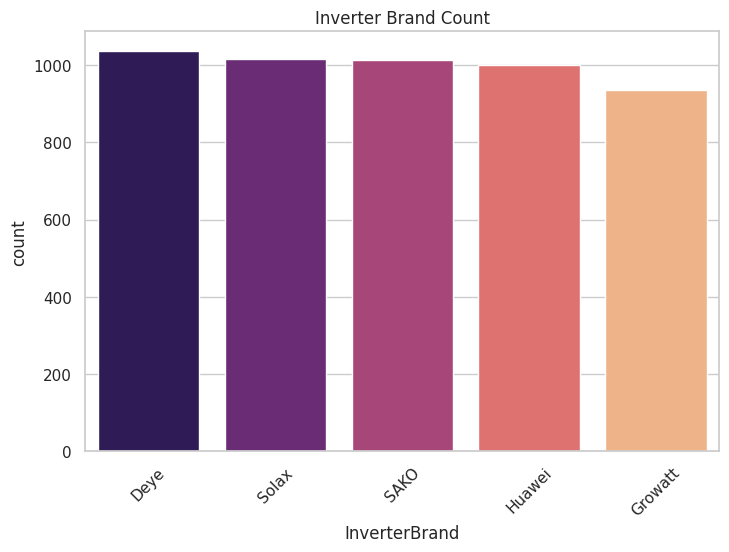

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
# Plot 2: Inverter Brand Popularity
plt.subplot(2, 2, 2)
sns.countplot(x='InverterBrand', data=df, palette='magma', order=df['InverterBrand'].value_counts().index)
plt.title('Inverter Brand Count')
plt.xticks(rotation=45)


Text(0, 0.5, 'Cost (LKR)')

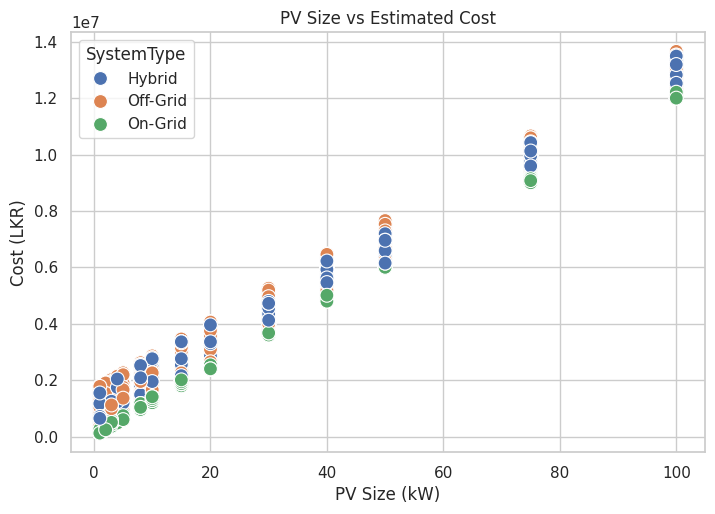

In [ ]:
# Plot 3: PV Size vs Estimated Cost (The most important relationship)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 3)
sns.scatterplot(x='PVSize(kW)', y='EstimatedCost(LKR)', hue='SystemType', data=df, s=100, palette='deep')
plt.title('PV Size vs Estimated Cost')
plt.xlabel('PV Size (kW)')
plt.ylabel('Cost (LKR)')

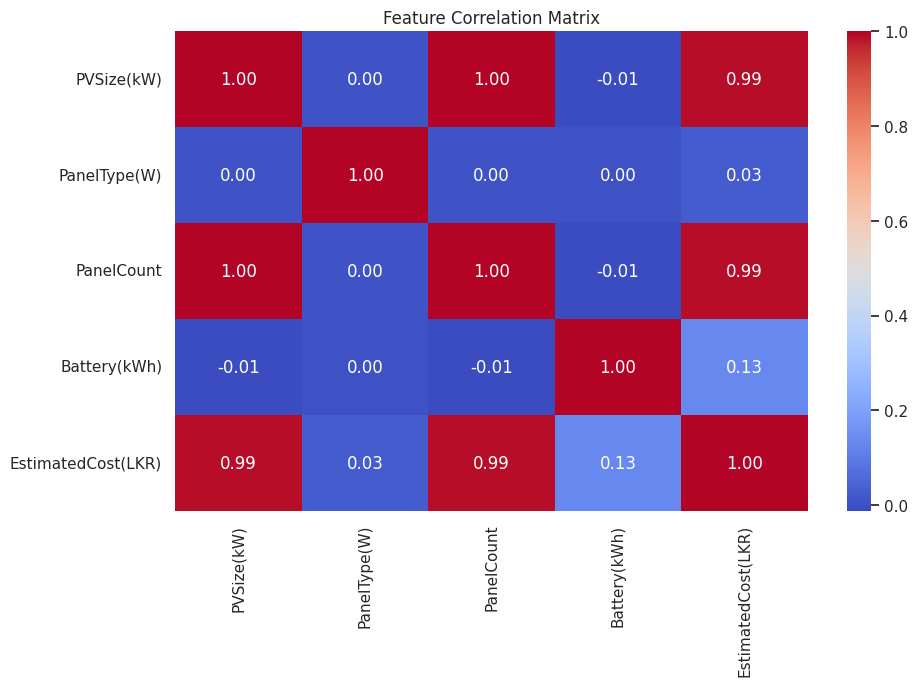

In [ ]:
# Plot 4: Correlation Heatmap (Numerical Features)
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 4)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

/tmp/ipython-input-109721197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SystemType', y='EstimatedCost(LKR)', data=df, palette='Set2')


Text(0, 0.5, 'Cost (LKR)')

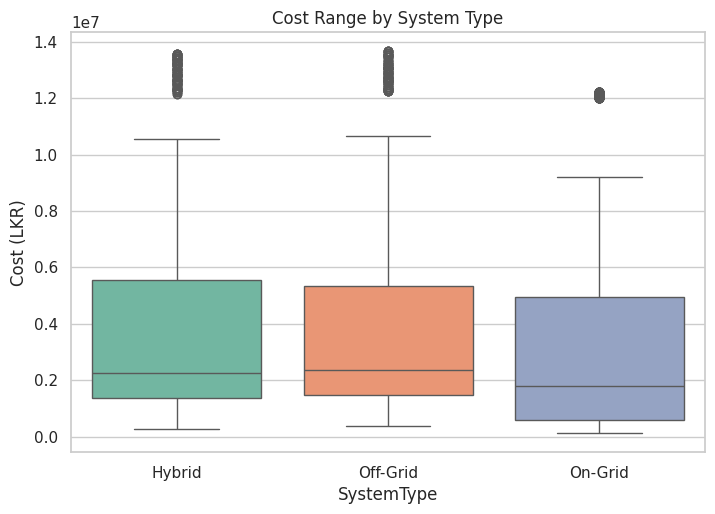

In [ ]:
# --- Plot 1: Cost Range by System Type (Boxplot) ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='SystemType', y='EstimatedCost(LKR)', data=df, palette='Set2')
plt.title('Cost Range by System Type')
plt.ylabel('Cost (LKR)')

Text(0, 0.5, 'Battery Size (kWh)')

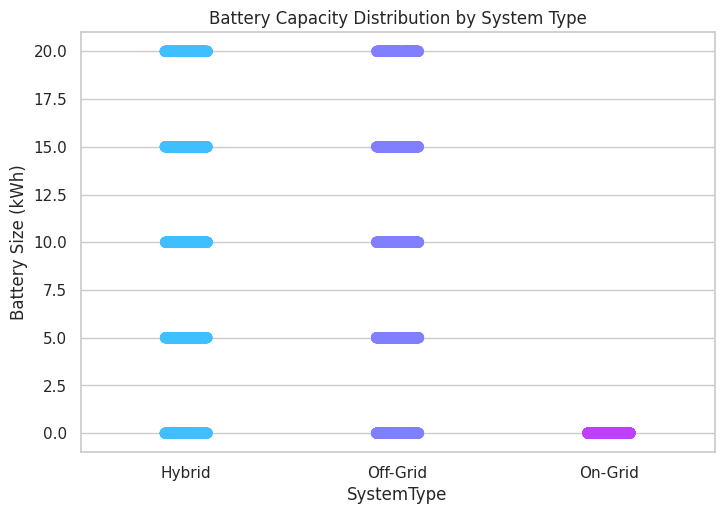

In [ ]:
# --- Plot 2: Battery Capacity Check (Strip Plot) ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 2)
sns.stripplot(x='SystemType', y='Battery(kWh)', data=df, jitter=True, size=8, palette='cool', hue='SystemType', legend=False)
plt.title('Battery Capacity Distribution by System Type')
plt.ylabel('Battery Size (kWh)')

Text(0.5, 1.0, 'Panel Count vs PV Size (Grouped by Panel Wattage)')

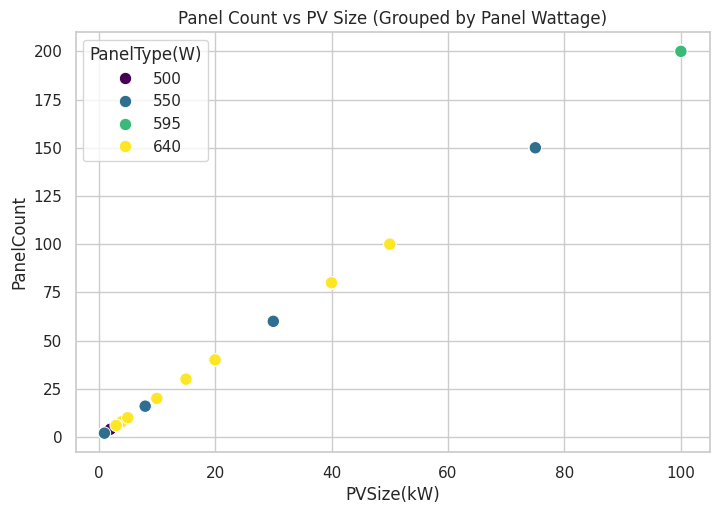

In [ ]:
# --- Plot 3: Panel Count vs PV Size (Scatter) ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 3)
sns.scatterplot(x='PVSize(kW)', y='PanelCount', hue='PanelType(W)', data=df, palette='viridis', s=80)
plt.title('Panel Count vs PV Size (Grouped by Panel Wattage)')

/tmp/ipython-input-2181807557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PanelType(W)', data=df, palette='pastel')


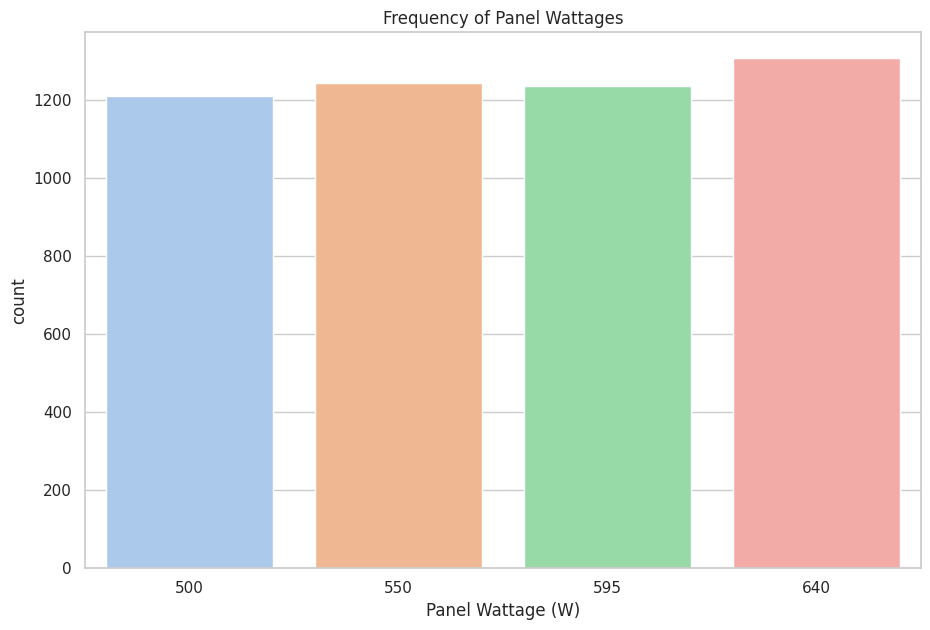

In [ ]:
# --- Plot 4: Panel Wattage Popularity ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 4)
sns.countplot(x='PanelType(W)', data=df, palette='pastel')
plt.title('Frequency of Panel Wattages')
plt.xlabel('Panel Wattage (W)')

plt.tight_layout()
plt.show()

## 4.feature Engineering

### 2. FEATURE ENGINEERING (INPUTS)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# ==========================================
# 2. ADVANCED FEATURE ENGINEERING (THE FIX)
# ==========================================

# --- A. Engineer the "Golden Features" ---
# 1. Theoretical Panel Count (The Hint)
# This teaches the model the math: Panels = (KW * 1000) / Watts
df['Math_Panel_Hint'] = (df['PVSize(kW)'] * 1000) / df['PanelType(W)']

# 2. Battery Required Flag
df['Battery_Required_Input'] = df['Battery(kWh)'].apply(lambda x: 1.0 if x > 0 else 0.0)

# --- B. Prepare Inputs ---
X_df = df[[
    'PVSize(kW)',
    'SystemType',
    'Battery_Required_Input',
    'InverterBrand',
    'PanelType(W)',
    'Math_Panel_Hint' # <--- NEW POWERFUL FEATURE
]].copy()

# --- C. Encoders (Save these for Android!) ---
le_system = LabelEncoder()
X_df['SystemType'] = le_system.fit_transform(X_df['SystemType'])

le_brand = LabelEncoder()
X_df['InverterBrand'] = le_brand.fit_transform(X_df['InverterBrand'])

# --- D. Scaling ---
# We use MinMaxScaler to keep all inputs strictly between 0 and 1
# This is much more stable for TFLite than StandardScaler
scaler = MinMaxScaler()
numerical_cols = ['PVSize(kW)', 'PanelType(W)', 'Math_Panel_Hint']
X_df[numerical_cols] = scaler.fit_transform(X_df[numerical_cols])

X = X_df.values.astype('float32')

In [ ]:
# ==========================================
# 3. TARGET PREPARATION (OUTPUTS)
# ==========================================
# We use LabelEncoders for classification targets
le_inv = LabelEncoder()
y_inv = le_inv.fit_transform(df['InverterSize'])

le_panel = LabelEncoder()
y_panel = le_panel.fit_transform(df['PanelCount'])

le_bat = LabelEncoder()
y_bat = le_bat.fit_transform(df['Battery(kWh)'])

y_cost = df['EstimatedCost(LKR)'].values.astype('float32')

In [ ]:
import json
from sklearn.model_selection import train_test_split

# ==========================================
# 4. SAVE METADATA (Updated for One-Hot)
# ==========================================
# We need to save the One-Hot categories so the App can replicate this.
metadata = {
    "feature_logic": {
        "num_features": ["PVSize(kW)", "Battery_Required", "PanelType(W)", "Theoretical_Panel_Count"],
        "cat_features": ["SystemType", "InverterBrand"]
    },
    "scaling": {
        "scale": scaler.scale_.tolist(),
        "min": scaler.data_min_.tolist(), # MinMaxScaler has data_min_ and data_max_
        "max": scaler.data_max_.tolist()
    },
    "label_encoder_classes": { # Corrected for LabelEncoder, 'enc' was not defined
        "SystemType": list(le_system.classes_),
        "InverterBrand": list(le_brand.classes_)
    },
    "output_maps": {
        "inverter_size": list(le_inv.classes_),
        "panel_count": [int(x) for x in le_panel.classes_],
        "battery_kwh": [float(x) for x in le_bat.classes_]
    }
}

with open("robust_model_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("✅ Advanced Feature Engineering Complete.")
print(f"✅ Input Features Count: {X.shape[1]}")

# Split Data
# Note: For a lookup-style model with small data, a small test set is fine.
X_train, X_test, y_inv_train, y_inv_test, y_panel_train, y_panel_test, y_bat_train, y_bat_test, y_cost_train, y_cost_test = train_test_split(
    X, y_inv, y_panel, y_bat, y_cost, test_size=0.1, random_state=42
)

✅ Advanced Feature Engineering Complete.
✅ Input Features Count: 6


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# ==========================================
# 5. ROBUST MODEL ARCHITECTURE
# ==========================================
input_layer = Input(shape=(X.shape[1],))

# Shared Layers - Increased Capacity
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.1)(x) # Low dropout to prevent over-regularization on small data

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)

In [ ]:
# --- Output Branches ---

# 1. Inverter Branch (High Complexity)
inv = Dense(64, activation='relu')(x)
out_inv = Dense(len(le_inv.classes_), activation='softmax', name='inverter')(inv)

# 2. Panel Branch (Math heavy)
# Helper: We feed the raw Theoretical Count directly into this branch too
panel_branch = Dense(64, activation='relu')(x)
out_panel = Dense(len(le_panel.classes_), activation='softmax', name='panel')(panel_branch)

# 3. Battery Branch
bat = Dense(64, activation='relu')(x)
out_bat = Dense(len(le_bat.classes_), activation='softmax', name='battery')(bat)

# 4. Cost Branch (Regression)
cost = Dense(64, activation='relu')(x)
out_cost = Dense(1, activation='linear', name='cost')(cost)

model = Model(inputs=input_layer, outputs=[out_inv, out_panel, out_bat, out_cost])

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'inverter': 'sparse_categorical_crossentropy',
        'panel': 'sparse_categorical_crossentropy',
        'battery': 'sparse_categorical_crossentropy',
        'cost': 'mae'
    },
    metrics={
        'inverter': 'accuracy',
        'panel': 'accuracy',
        'battery': 'accuracy',
        'cost': 'mae' # Just monitor MAE
    }
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ==========================================
# 6. TRAINING STRATEGY (Epochs & Callbacks)
# ==========================================
# Learning Rate Scheduler: Slows down learning when accuracy stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=50, min_lr=0.00001)

# Early Stopping: Stops if model isn't getting better for 100 epochs
early_stop = EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)

print("🚀 Training Robust Model (May take 1-2 mins)...")
history = model.fit(
    X_train,
    [y_inv_train, y_panel_train, y_bat_train, y_cost_train],
    validation_data=(X_test, [y_inv_test, y_panel_test, y_bat_test, y_cost_test]),
    epochs=1000,  # High epochs are safe for small data to ensure convergence
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=0
)
print("✅ Training Complete.")

🚀 Training Robust Model (May take 1-2 mins)...
✅ Training Complete.


In [ ]:
# Check final metrics manually
preds = model.predict(X_test, verbose=0)

from sklearn.metrics import accuracy_score, mean_absolute_error

acc_inv = accuracy_score(y_inv_test, np.argmax(preds[0], axis=1))
acc_panel = accuracy_score(y_panel_test, np.argmax(preds[1], axis=1))
acc_bat = accuracy_score(y_bat_test, np.argmax(preds[2], axis=1))
mae_cost = mean_absolute_error(y_cost_test, preds[3])

print("\n" + "="*40)
print("🏆 ROBUST MODEL REPORT")
print("="*40)
print(f"✅ Inverter Accuracy: {acc_inv*100:.2f}%")
print(f"✅ Panel Accuracy:    {acc_panel*100:.2f}%")
print(f"✅ Battery Accuracy:  {acc_bat*100:.2f}%")
print(f"💰 Cost Error (MAE):  LKR {mae_cost:,.2f}")
print("="*40)

# Export if good
if acc_inv > 0.95:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("robust_solar_model.tflite", "wb") as f:
        f.write(tflite_model)
    print("✅ Exported 'robust_solar_model.tflite'")


🏆 ROBUST MODEL REPORT
✅ Inverter Accuracy: 53.60%
✅ Panel Accuracy:    72.40%
✅ Battery Accuracy:  60.40%
💰 Cost Error (MAE):  LKR 335,879.72
